## Regulatory document names

In [4]:
doc_v = []
docs = ['insider trading']
for i in docs:
    doc_v.append(i.split())
doc_v

[['insider', 'trading']]

## Query Input

In [1]:
query = "What are the regulations pertaining to insider in SEBI"
qvocab = query.split()
t=0
for i in qvocab:
    if('?' in i):
        qvocab[t] = qvocab[t].replace('?','')
    t=t+1
qvocab

['What',
 'are',
 'the',
 'regulations',
 'pertaining',
 'to',
 'insider',
 'in',
 'SEBI']

#### Identify the presence of doc names

In [5]:
t=0
d=0
for i in qvocab:
    p=0
    while(p<len(doc_v)):
        k = doc_v[p]
        if(i == k[0]):
            if(qvocab[t+1] == k[1]):
                d=1
                document = doc_v[p]
                qvocab.remove(k[0])
                qvocab.remove(k[1])
                ind = t
                break
        p=p+1
    t=t+1
if(d==1):
    print(document)
else:
    print('Not document specific')
    document = []

Not document specific


YET TO DO: removes 'trading' from original query for trading related regulation

In [105]:
#if document specific
query = query.replace(query.split()[ind],'')
query = query.replace(query.split()[ind],'')

In [107]:
query = 'What are the regulations pertaining to trading in  '

## Definitions Extraction

In [2]:
from io import StringIO

from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFParser

def convert_pdf_to_string(file_path):

	output_string = StringIO()
	with open(file_path, 'rb') as in_file:
	    parser = PDFParser(in_file)
	    doc = PDFDocument(parser)
	    rsrcmgr = PDFResourceManager()
	    device = TextConverter(rsrcmgr, output_string, laparams=LAParams())
	    interpreter = PDFPageInterpreter(rsrcmgr, device)
	    for page in PDFPage.create_pages(doc):
	        interpreter.process_page(page)

	return(output_string.getvalue())

                
def convert_title_to_filename(title):
    filename = title.lower()
    filename = filename.replace(' ', '_')
    return filename


def split_to_title_and_pagenum(table_of_contents_entry):
    title_and_pagenum = table_of_contents_entry.strip()
    
    title = None
    pagenum = None
    
    if len(title_and_pagenum) > 0:
        if title_and_pagenum[-1].isdigit():
            i = -2
            while title_and_pagenum[i].isdigit():
                i -= 1

            title = title_and_pagenum[:i].strip()
            pagenum = int(title_and_pagenum[i:].strip())
        
    return title, pagenum

In [401]:
#writer = PyPDF2.PdfFileWriter()

#for page in range(1,4):

#    writer.addPage(reader.getPage(page))
    
#output_filename = '/home/deepti-saravanan/Desktop/pdftext.pdf'

#with open(output_filename, 'wb') as output:
#    writer.write(output)
    
text = convert_pdf_to_string(
    '/home/deepti-saravanan/Desktop/missed/1597053379447.pdf')

In [402]:
t=0
for i in text.split():
    #print(i)
    if(i=='Definitions'):
        p=t
        #print(p)
        break
    t=t+1
t=0
for i in text.split():
    if(i=='CHAPTER'):
        if(text.split()[t+2] == 'II'):
            break
    t=t+1
    
i = p+1
definitions = []
while(i<t):
    definitions.append(text.split()[i])
    i=i+1

In [1]:
#definitions

In [164]:
#Nested keys extraction
t=0
nestedkeys = []
for i in definitions:
    if('Explanation' in i):
        p=t
        k=t
        while(p<len(definitions)):
            if('(' in definitions[p]):
                break
            p=p+1
        while(k<p):
            if(definitions[k][0].isalpha() == False):
                if(definitions[k][0] != '(' and definitions[k][0].isnumeric() == False and definitions[k][0] != '–'):
                    s= ''
                    s = s + definitions[k]
                    if(definitions[k][-1].isalpha()!=False):
                        l=k+1
                        num = l+10
                        while(l<num):
                            if(definitions[l][-1].isalpha() == False):
                                m=k+1
                                while(m<l+1):
                                    s = s + " " + definitions[m]
                                    m=m+1
                                break
                            l=l+1
                    nestedkeys.append(s)
            k=k+1
    t=t+1

In [165]:
#Cleaning keys
p=0
for i in nestedkeys:
    t=1
    s=''
    while(t<len(i)-1):
        s = s + i[t]
        t=t+1
    nestedkeys[p] = s
    p=p+1
nestedkeys

['associate',
 'relevant date',
 'Explanation',
 'lenders',
 'associate',
 '',
 '',
 'housing finance company',
 'systemically important non-banking financial company',
 '',
 'regulatory sandbox',
 '']

In [130]:
#Nested Key values
t=0
nestedvalues = []
for i in definitions:
    if('Explanation' in i):
        p=t
        k=t
        while(p<len(definitions)):
            if('(' in definitions[p]):
                break
            p=p+1
        while(k<p):
            if('mean' in definitions[k]):
                s = ''
                k=k+1
                while(k<p):
                    s = s + ' ' + definitions[k]
                    k=k+1
                nestedvalues.append(s)
                break
            k=k+1
    t=t+1
nestedvalues

[' the aggregate value of paid up equity capital plus free reserves',
 ' any bank included in the Second Schedule to the Reserve Bank of India Act, 1934',
 ' a live testing environment where new products, processes, services, business models, etc. may be deployed on a limited set of eligible customers for a specified period of time, for furthering innovation in the securities market, subject to such conditions as may be specified by the Board.] CHAPTER VII MISCELLANEOUS Power of the Board to issue clarifications. 43. In order to remove any difficulties in respect of the application or interpretation of these regulations, the Board may issue clarifications or guidelines in the form of circulars. SCHEDULE I FORMS FORM A Page 28 of 62 Securities and Exchange Board of India']

In [131]:
#Cleaning values
l=0
for i in nestedvalues:
    sent = ''
    for j in i.split():
        if(j[-1].isalpha() == False):
            if(j[-1] != ',' and j[-1] != '.'):
                #print(j)
                s = ''
                for k in j:
                    if(k.isalpha() == True):
                        s = s + k
                sent = sent + ' ' + s
            else:
                sent = sent + ' ' + j
        else:
            sent = sent + ' ' + j
    nestedvalues[l] = sent
    l=l+1
nestedvalues

[' the aggregate value of paid up equity capital plus free reserves',
 ' any bank included in the Second Schedule to the Reserve Bank of India Act, ',
 ' a live testing environment where new products, processes, services, business models, etc. may be deployed on a limited set of eligible customers for a specified period of time, for furthering innovation in the securities market, subject to such conditions as may be specified by the Board CHAPTER VII MISCELLANEOUS Power of the Board to issue clarifications. 43. In order to remove any difficulties in respect of the application or interpretation of these regulations, the Board may issue clarifications or guidelines in the form of circulars. SCHEDULE I FORMS FORM A Page  of  Securities and Exchange Board of India']

In [255]:
#Remove explanation part from original tokens
t=0
for i in definitions:
    if('Explanation' in i):
        p=t
        k=t
        while(p<len(definitions)):
            if('(' in definitions[p]):
                break
            definitions[p] = ''
            p=p+1
    t=t+1
while("" in definitions) : 
    definitions.remove("")

YET TO DO: '(' present within notes sometimes - try for a better end token

In [75]:
#Remove NOTE part from original tokens
t=0
for i in definitions:
    if('NOTE' in i):
        p=t
        k=t
        while(p<len(definitions)):
            if('(' in definitions[p]):
                break
            #print(definitions[p])
            definitions[p] = ''
            p=p+1
        #print('--------------------------------------')
    t=t+1
while("" in definitions) : 
    definitions.remove("")

In [403]:
k=0
for i in definitions:
    if('Act' in i):
        print(k)
        break
    k=k+1

16


YET TO DO: Footnotes removal

In [140]:
#Removing footnotes and extras
d = definitions
i=k-1
definitions = []
while(i<len(d)):
    definitions.append(d[i])
    i=i+1
definitions

['62']

In [138]:
k=0
for i in definitions:
    if(i == '(m)'):
        print(k)
    k=k+1

445
3165


In [139]:
i=445
while(i<930):
    definitions[i] = ""
    i=i+1

In [104]:
while("" in definitions):
    definitions.remove("")

In [170]:
for i in definitions:
    if(i == '"target'):
        print(i)

In [404]:
import re
t=0
defwords = []
s = ''
for i in definitions:
    #x = str(0)
    #x = re.match('[a-z()^]', i)
    regex = re.compile('[@_!#$%^&*()<>?/\|}{~]')
    #print(i)
    if(regex.search(i) != None):
        if(len(i) == 3):
            if(definitions[t+1][0].isalpha() == False):
                #print(i)
                #print(definitions[t+1])
                s = definitions[t+1]
                if(definitions[t+1][-1].isalpha()!=False):
                    p=t+2
                    num = p+10
                    while(p<num):
                        if(definitions[p][-1].isalpha() == False):
                            m=t+2
                            while(m<p+1):
                                s = s + " " + definitions[m]
                                m=m+1
                            break
                        p=p+1
                defwords.append(s)
    t=t+1
t=0
defwords

['"Act"',
 '"Board"',
 '"Chairman"',
 '"compensatory allowance"',
 '"Competent Authority"',
 '"Dependent"',
 '"duty"',
 '"family"',
 '"leave pay"',
 '"Pay"',
 '"Personal pay"',
 '"special allowance"',
 '"special pay"',
 '"substantive pay"',
 '"year"',
 '"service"',
 '(c)',
 '6[***]',
 '8[(a)',
 '17[or sub-regulations (3A)]',
 '14',
 '6',
 '29[',
 '1st April or 1st October)',
 '(a)',
 '(a)',
 '57[and clause (d)]of Sub Regulation (4)',
 '35',
 '35)”']

In [405]:
p=0
for i in defwords:
    t=1
    #print(i)
    s = ''
    while(t<len(i)-1):
        s = s + i[t]
        t=t+1
    defwords[p] = s
    p=p+1
defwords

['Act',
 'Board',
 'Chairman',
 'compensatory allowance',
 'Competent Authority',
 'Dependent',
 'duty',
 'family',
 'leave pay',
 'Pay',
 'Personal pay',
 'special allowance',
 'special pay',
 'substantive pay',
 'year',
 'service',
 'c',
 '[***',
 '[(a',
 '7[or sub-regulations (3A)',
 '',
 '',
 '9',
 'st April or 1st October',
 'a',
 'a',
 '7[and clause (d)]of Sub Regulation (4',
 '',
 '5)']

In [385]:
#d = []
t=5
while(t<len(defwords)):
    d.append(defwords[t])
    t=t+1

In [384]:
d.append('net worth')

In [387]:
d[14] = 'wilful defaulter'
defwords = d
defwords

['Act',
 'advertisement',
 'Board',
 'book building',
 'debt securities',
 'designated stock exchange',
 'issuer',
 'net worth',
 'private placement',
 'public issue',
 'offer document',
 'recognised stock exchange',
 'schedule',
 'specified',
 'wilful defaulter']

In [406]:
d = defwords
defwords = []
t=0
while(t<16):
    defwords.append(d[t])
    t=t+1
defwords

['Act',
 'Board',
 'Chairman',
 'compensatory allowance',
 'Competent Authority',
 'Dependent',
 'duty',
 'family',
 'leave pay',
 'Pay',
 'Personal pay',
 'special allowance',
 'special pay',
 'substantive pay',
 'year',
 'service']

In [161]:
d = []
d.append('Act')
d.append('body corporate')
t=1
while(t<6):
    d.append(defwords[t])
    t=t+1
d[5] = 'registrar to an issue'
d[6] = 'share transfer agent'
defwords = d
defwords

['Act',
 'body corporate',
 'form',
 'inspecting authority',
 'principal officer',
 'registrar to an issue',
 'share transfer agent']

In [178]:
i=26
t=0
l=['tendering period','volume weighted average market price','volume weighted average price','weighted average number of total shares','wilful defaulter','working day']
while(i<32):
    defwords.append(l[t])
    t=t+1
    i=i+1

In [181]:
defwords[17] = 'postal ballot'

In [407]:
lastword = []
for i in defwords:
    lastword.append(i.split()[-1])
firstword = []
for i in defwords:
    firstword.append(i.split()[0])

In [408]:
print(len(lastword))
print(len(firstword))

16
16


Appending extra dummy word for iteration purpose

In [409]:
firstword.append('Pizza')
#firstword

In [410]:
lastword.append('Pizza')
#lastword

In [416]:
k=0
t=0
defvalues = []
s=''
#s = definitions[0] + ' ' + definitions[1]
while(k<len(definitions)):
    if(definitions[k][0].isalpha() == False):
        if(firstword[t] in definitions[k]):
            #print(firstword[t])
            defvalues.append(s)
            s = ''
            #print(s)
            if(lastword[t] in definitions[k+1]):
                #print(lastword[t])
                k=k+1
                t=t+1
            elif(lastword[t] in definitions[k+2]):
                #print(lastword[t])
                k=k+2
                t=t+1
            elif(lastword[t] in definitions[k+3]):
                #print(lastword[t])
                k=k+3
                t=t+1
            else:
                #print(lastword[t])
                t=t+1
            #print('----------------------------------------------')
        else:
            s = s + ' ' + definitions[k]
    else:
        s = s + ' ' + definitions[k]
    k=k+1
defvalues.append(s)
defvalues

[' 3. (1) In these regulations, unless there is anything repugnant in the subject or context— (a)',
 ' means the Securities and Exchange Board of India Act, 1992 (15 of 1992). Section 3 of the Act. (b)',
 ' means the Securities and Exchange Board of India constituted under (c)',
 ' of the Board and, in relation to the powers exercisable by him, includes whole- time member of the Board or a Committee of Executive Directors or Executive Director or any other officer to whom the powers under these regulations may be delegated by the Chairman. (d)',
 ' means an allowance granted to meet expenditure necessitated by the special circumstances in which the duty is performed. (e)',
 ' means, (i) The Chairman in the case of officers, which expression shall also include whole- time member of the Board or Executive Director, in regard to any matter or power to be dealt with or exercisable by the Chairman under these Regulations, but which are delegated to him. (ii) In the case of all other employe

In [393]:
d = defvalues
i=1
defvalues = []
while(i<len(d)):
    defvalues.append(d[i])
    i=i+1
len(defvalues)

1

In [115]:
#Appending the captured nested values
for i in nestedkeys:
    defwords.append(i)
for i in nestedvalues:
    defvalues.append(i)

In [56]:
d = defwords
defwords = []
t=0
while(t<6):
    defwords.append(d[t])
    t=t+1

In [417]:
p = defvalues[16]
s = ''
for i in p.split():
    #print(i)
    if(i != 'authority.'):
        s = s + ' ' + i
    else:
        s = s + ' ' + i
        break

In [ ]:
d = defwords
defwords = ['Act']
for i in d:
    defwords.append(i)
#defwords

In [158]:
defvalues[0] = 'means the Securities and Exchange Board of India Act, 1992 (15 of 1992)'

In [418]:
defvalues[16] = s

In [ ]:
#defwords

In [419]:
d = []
t=1
while(t<17):
    d.append(defvalues[t])
    t=t+1
defvalues = d

In [84]:
#defvalues.remove("")
defvalues[15] = ' of the firm or a limited liability partnership who renders investment advice on behalf of the firm or limited liability partnership;'
defvalues.append('means an employee or an agent of an investment adviser who renders investment advice on behalf of that investment adviser.')

In [78]:
#defwords.remove('b')
defwords.append('representative')

In [283]:
print(len(defwords))
print(len(defvalues))

11
11


In [420]:
defdict = dict(zip(defwords,defvalues))
defdict

{'Act': ' means the Securities and Exchange Board of India Act, 1992 (15 of 1992). Section 3 of the Act. (b)',
 'Board': ' means the Securities and Exchange Board of India constituted under (c)',
 'Chairman': ' of the Board and, in relation to the powers exercisable by him, includes whole- time member of the Board or a Committee of Executive Directors or Executive Director or any other officer to whom the powers under these regulations may be delegated by the Chairman. (d)',
 'compensatory allowance': ' means an allowance granted to meet expenditure necessitated by the special circumstances in which the duty is performed. (e)',
 'Competent Authority': ' means, (i) The Chairman in the case of officers, which expression shall also include whole- time member of the Board or Executive Director, in regard to any matter or power to be dealt with or exercisable by the Chairman under these Regulations, but which are delegated to him. (ii) In the case of all other employees, concerned ) Executi

In [421]:
import json
with open('./Definitions/EMPLOYEES-SERVICE.json', 'w') as fp:
    json.dump(defdict, fp)

#### Query Expansion

Creating definitions dictionary

In [4]:
import os, json
import pandas as pd
defdict = {}

path_to_json = './Definitions/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

for i in json_files:
    with open('./Definitions/'+i) as json_file: 
        data = json.load(json_file)
    defdict.update(data)
len(defdict)

276

In [5]:
#Expanding the query
q = query
keys = list(defdict.keys())
values = list(defdict.values())
qnew = ''
for j in q.split():
    k=0
    for i in keys:
        if(i==j):
            print(i)
            print(k)
            s = i
            s = s + values[k]
            qnew = qnew + ' ' + s
            break
        k=k+1
    else:
        qnew = qnew + ' ' + j
qnew

regulations
3
insider
124


' What are the regulations means Securities and Exchange Board of India (Stock Brokers 12[***] ) (f) pertaining to insider means any person who is: i) a connected person; or information; ii) in possession of or having access to unpublished price sensitive (h) in SEBI'

TO BE DONE: Extract rules from that doc alone

In [2]:
import pandas as pd
data = pd.read_csv('/home/deepti-saravanan/Desktop/laws/semantics/data/final_rules.csv')
rules = data['text'].tolist()
#print(rules)
t=-1
vocab = []
for i in rules:
    t=t+1
    vocab.append(i.split())

## Extraction of keywords from query

In [6]:
from collections import OrderedDict
import numpy as np
import spacy
import csv
from spacy.lang.en.stop_words import STOP_WORDS
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs

nlp = spacy.load('en_core_web_sm')


class TextRank4Keyword():
	"""Extract keywords from text"""
    
	def __init__(self):
		self.d = 0.85 # damping coefficient, usually is .85
		self.min_diff = 1e-5 # convergence threshold
		self.steps = 10 # iteration steps
		self.node_weight = None # save keywords and its weight

    
	def set_stopwords(self, stopwords):  
		"""Set stop words"""
		for word in STOP_WORDS.union(set(stopwords)):
			lexeme = nlp.vocab[word]
			lexeme.is_stop = True
    
	def sentence_segment(self, doc, candidate_pos, lower):
		"""Store those words only in cadidate_pos"""
		sentences = []  
		pos = []
		for sent in doc.sents:
			selected_words = []
			postags = []
			for token in sent:
				# Store words only with cadidate POS tag
				if token.pos_ in candidate_pos and token.is_stop is False:
					if lower is True:
						selected_words.append(token.text.lower())
						postags.append(token.pos_)
					else:
						selected_words.append(token.text)
						postags.append(token.pos_)                
			sentences.append(selected_words)
			pos.append(postags)            
		return sentences, pos
        
	def get_vocab(self, sentences, pos):
		"""Get all tokens"""
		vocab = OrderedDict()
		sent = {}
		post = {}
		i = 0
		counter = 0
		for sentence in sentences:
			c2 = 0
			for word in sentence:
				if word not in vocab:
					vocab[word] = i
					sent[word] = sentence 
					val = pos[counter] 
					val1 = val[c2]
					post[word] = val1
					i += 1
				c2+=1
			counter +=1
		#print("-----------------------------")
		#print(type(sent))
		#print(sent['officer'])
		return vocab,sent,post
    
	def get_token_pairs(self, window_size, sentences):
		"""Build token_pairs from windows in sentences"""
		token_pairs = list()
		for sentence in sentences:
			for i, word in enumerate(sentence):
				for j in range(i+1, i+window_size):
					if j >= len(sentence):
						break
					pair = (word, sentence[j])
					if pair not in token_pairs:
						token_pairs.append(pair)
		return token_pairs
        
	def symmetrize(self, a):
		return a + a.T - np.diag(a.diagonal())
    
	def get_matrix(self, vocab, token_pairs):
		"""Get normalized matrix"""
		# Build matrix
		vocab_size = len(vocab)
		g = np.zeros((vocab_size, vocab_size), dtype='float')
		for word1, word2 in token_pairs:
			i, j = vocab[word1], vocab[word2]
			g[i][j] = 1
            
		# Get Symmeric matrix
		g = self.symmetrize(g)
        
		# Normalize matrix by column
		norm = np.sum(g, axis=0)
		g_norm = np.divide(g, norm, where=norm!=0) # this is ignore the 0 element in norm
        
		return g_norm

    
	def get_keywords(self, sent, postags, number=120):
		"""Print top number keywords"""
		sentlist = []
		poslist = []
		node_weight = OrderedDict(sorted(self.node_weight.items(), key=lambda t: t[1], reverse=True))
		for i, (key, value) in enumerate(node_weight.items()):
			sentlist.append(sent[key])
			poslist.append(postags[key])
            
		return sentlist, poslist
        
        
	def analyze(self, text, candidate_pos=['NOUN', 'PROPN','VERB'], window_size=4, lower=False, stopwords=list()):
		"""Main function to analyze text"""
        
		# Set stop words
		self.set_stopwords(stopwords)
        
		# Pare text by spaCy
		doc = nlp(text)
        
		# Filter sentences
		sentences, pos = self.sentence_segment(doc, candidate_pos, lower) # list of list of words
        
		# Build vocabulary
		vocab,sent,postags = self.get_vocab(sentences, pos)
        
		# Get token_pairs from windows
		token_pairs = self.get_token_pairs(window_size, sentences)
        
		# Get normalized matrix
		g = self.get_matrix(vocab, token_pairs)
        
		# Initionlization for weight(pagerank value)
		pr = np.array([1] * len(vocab))
        
		# Iteration
		previous_pr = 0
		for epoch in range(self.steps):
			pr = (1-self.d) + self.d * np.dot(g, pr)
			if abs(previous_pr - sum(pr))  < self.min_diff:
				break
			else:
				previous_pr = sum(pr)

		# Get weight for each node
		node_weight = dict()
		for word, index in vocab.items():
			node_weight[word] = pr[index]
        
		self.node_weight = node_weight

		sentlist, poslist = tr4w.get_keywords(sent, postags, 120)
		

		return sentlist,poslist

Case File reading

In [4]:
text = convert_pdf_to_string(
    '/home/deepti-saravanan/Downloads/case.pdf')

In [7]:
#Keywords
text = qnew
tr4w = TextRank4Keyword()
sentlist, posq = tr4w.analyze(text, candidate_pos = ['NOUN', 'PROPN', 'VERB'], window_size=4, lower=False)
print(len(sentlist))
print(len(posq))

19
19


In [8]:
qnew

' What are the regulations means Securities and Exchange Board of India (Stock Brokers 12[***] ) (f) pertaining to insider means any person who is: i) a connected person; or information; ii) in possession of or having access to unpublished price sensitive (h) in SEBI'

In [9]:
keywords = []
pos = []
t=0
while(t<len(sentlist)):
    i = sentlist[t]
    j = posq[t]
    counter = 0
    for tok in i:
        if(tok not in keywords):
            if(len(tok) > 1):
                if(tok not in keywords):
                    keywords.append(tok)
                    pos.append(posq[counter])
        counter += 1
    t=t+1
print(len(keywords))
print(len(pos))

17
17


In [10]:
removewords = ['regulations','rules','chapter','section','sub','SEBI','means','shall','Securities','Exchange','pertaining']
for token in removewords:
    for i in keywords:
        if(i == token):
            t = i.index(token)
            keywords.remove(token)
            val = pos[t]
            pos.remove(val)

print(len(keywords))
print(len(pos))

11
11


In [11]:
posq = pos

In [270]:
#keywords.remove('pertaining')
#keywords.remove('includes')
keywords.append('unpublished')
keywords.append('sensitive')
keywords

['price', 'information', 'unpublished', 'sensitive']

In [12]:
query = qnew

In [13]:
sent = nlp(query)

In [14]:
posq = []
for token in sent:
    for i in keywords:
        if(str(token) == i):
            posq.append(token.tag_)
posq

['NNP', 'NNP', 'NNP', 'NNP', 'NN', 'NN', 'NN', 'NN', 'NN', 'VBG', 'NN', 'NN']

Can include words from subheadings with keywords - CHECK

In [15]:
#Synonyms of remaining keywords
from nltk.corpus import wordnet
other=[]
synonyms = []
t=0
for w in keywords:
    if('N' in posq[t]):
        for syn in wordnet.synsets(w, pos='n'):
            for l in syn.lemmas():
                if(l.name() not in synonyms):
                    synonyms.append(l.name())
                #other.append(l.derivationally_related_forms())
    if('V' in posq[t]):
        for syn in wordnet.synsets(w, pos='v'):
            for l in syn.lemmas():
                if(l.name() not in synonyms):
                    synonyms.append(l.name())
                other.append(l.derivationally_related_forms())
    t=t+1
for i in other:
    if(i != []):
        n = i[0].name()
        if(n not in synonyms):
            synonyms.append(n)
    
for i in keywords:
    if(i not in synonyms):
        synonyms.append(i)
len(synonyms)

70

In [129]:
#Including keywords in subheadings having the query keywords
#synonyms.append('fair')
synonyms.append('unpublished')
synonyms.append('price')
synonyms.append('sensitive')
synonyms.append('information')

In [15]:
synonyms = keywords

In [16]:
#Queries
poss = []
for i in synonyms:
    poss.append(token.tag_)
t=0
for i in poss:
    if(i == 'NNP'):
        poss[t] = 'NN'
    t=t+1
poss

['NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN']

In [17]:
posq = poss

In [21]:
#Case files
t=0
for i in posq:
    if(i == 'VERB'):
        posq[t] = 'V'
    elif(i == 'NOUN'):
        posq[t] = 'NN'
    else:
        posq[t] = 'NP'
    t+=1
len(posq)

6

## Prefix tree - extract keywords-specific regulations

In [18]:
#trie0, trie1 etc
from lexpy.trie import Trie
#trie = Trie()
i=0
while(i<len(vocab)):
    input_words = vocab[i]

    globals()['trie%s' % i] = Trie()
    globals()['trie%s' % i].add_all(input_words)
    i=i+1

In [19]:
#list0, list1 etc
import re
for w in synonyms:
    i=0
    while(i<len(vocab)):
        name = w + str(i)
        globals()['list%s' % name] = globals()['trie%s' % i].search_within_distance(w, dist=3)
        t=0
        while(t<len(globals()['list%s' % name])):
            globals()['list%s' % name][t] = globals()['list%s' % name][t].replace(',','')
            globals()['list%s' % name][t] = globals()['list%s' % name][t].replace(')','')
            globals()['list%s' % name][t] = globals()['list%s' % name][t].replace('(','')
            globals()['list%s' % name][t] = re.sub("\d+", "", globals()['list%s' % name][t]) 
            t=t+1
        i=i+1

In [20]:
related_rules = []
for w in synonyms:
    i=0
    while(i<len(vocab)):
        j=len(vocab)-1
        name1 = w + str(i)
        name2 = w + str(j)
        while(j>i):
            if(float(len(set(globals()['list%s' % name1]) | set(globals()['list%s' % name2]))) == 0):
                res=0
            else:
                res = len(set(globals()['list%s' % name1]) & set(globals()['list%s' % name2])) / float(len(set(globals()['list%s' % name1]) | set(globals()['list%s' % name2]))) * 100
            if(res != 0):
                related_rules.append([i,j,res])
            j=j-1
        i=i+1    

In [21]:
ind = []
for i in related_rules:
    if(i[0] not in ind):
        ind.append(i[0])
    if(i[1] not in ind):
        ind.append(i[1])

In [22]:
tradingr = []
for i in ind:
    tradingr.append(rules[i])
print(len(tradingr))

2343


In [23]:
import nltk
from nltk.tokenize import word_tokenize

In [24]:
trading = []
indt = []
t=0
for i in tradingr:
    text = word_tokenize(i.lower())
    tags = nltk.pos_tag(text)
    iterno = 0
    for w in synonyms:
        if(w in i):
            for j in tags:
                if(w in j[0]):
                    if(j[1] == posq[iterno]):
                        if(i not in trading):
                            #print(w)
                            #print(i)
                            #print('-----------------------')
                            #print(poss[iterno])
                            #indt.append(ind[t])
                            indt.append(t)
                            trading.append(i)
        iterno = iterno + 1
    t=t+1

In [25]:
len(trading)

500

## Clustering the regulations

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
%store -r X1w2v

In [28]:
%store -r X2w2v

In [29]:
X1 = X1w2v
X2 = X2w2v

In [30]:
len(trading)

500

In [31]:
k=[]
j=0
sentences = trading
for i in trading:
    k = i.split()
    sentences[j] = k
    j=j+1

In [32]:
#Vector value calculation for regulations
#X1 = model[model.wv.vocab]  #Vector values
#X2 = list(model.wv.vocab)   #Tokens
X0 = []
val1 = []
for i in sentences:
    val = [0] * 100
    c = 0
    for j in i:
        p=0
        val2 = [0]*100
        while(p<len(X2)):
            if(j == X2[p]):
                val2 = X1[p]
                break
            p=p+1
        #print(p)
        for ct in range(0, len(val)): 
            val1.append(val[ct] + val2[ct])
        val = val1
        val1 = []
        c=c+1
    d = []
    for l in val:
        l = l/c
        d.append(l)
    val = d
    X0.append(val)

In [33]:
len(X0)

500

In [34]:
from sklearn.manifold import SpectralEmbedding
n_dim = 2
embeddings = SpectralEmbedding(n_components=n_dim)

In [35]:
import pandas as pd

In [36]:
subjects = pd.DataFrame(
    embeddings.fit_transform(X0),
    columns=['x{}'.format(i) for i in range(n_dim)])

In [37]:
df = pd.DataFrame(subjects)
df

x0        x1
0   -0.004663 -0.001952
1    0.005312 -0.005096
2    0.008057  0.000592
3    0.011215  0.007631
4   -0.004166 -0.003053
..        ...       ...
495 -0.003759 -0.001567
496 -0.002721 -0.006851
497  0.006421 -0.003007
498 -0.006487  0.006685
499 -0.004339 -0.003465

[500 rows x 2 columns]

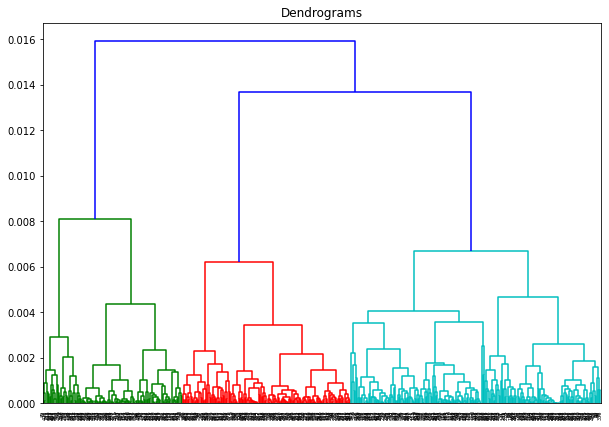

In [38]:
#Number of Clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='average'))

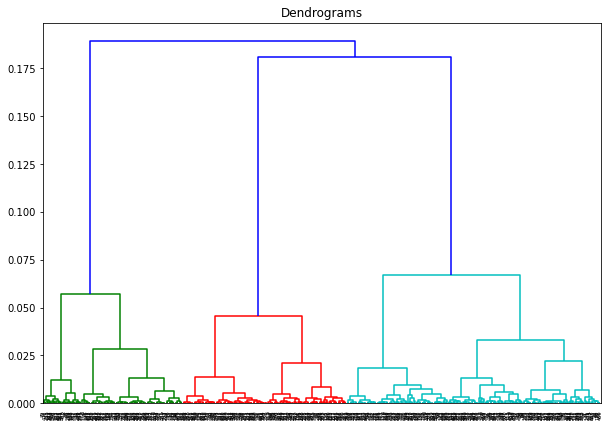

In [39]:
#Number of Clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

In [40]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
label = cluster.fit_predict(df)
#label

In [41]:
c0=0
c1=0
c2=0
#c3=0
for i in label:
    if(i==0):
        c0=c0+1
    elif(i==1):
        c1=c1+1
    #elif(i==2):
    #    c2=c2+1
    else:
        c2=c2+1
print(c0)
print(c1)
print(c2)
#print(c3)

228
125
147


In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df, 'average')
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [43]:
silhouette_avg = silhouette_score(subjects, label)
silhouette_avg

0.6277987722157947

In [44]:
davies_bouldin_score(subjects, label)

0.49660423663497427

In [45]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(df))
c

0.8380044987657881

In [46]:
#Cluster-wise separation of regulations
t=-1
rid0 = []
rid1 = []
rid2 = []
rid3 = []
for i in label:
    t=t+1
    if(i==0):
        rid0.append(t)
    elif(i==1):
        rid1.append(t)
    elif(i==2):
        rid2.append(t)
    else:
        rid3.append(t)

In [47]:
trading = []
for i in indt:
    trading.append(rules[i])
print(len(trading))

500


In [48]:
r0 = []
r1 = []
r2 = []
r3=[]
for i in rid0:
    r0.append(trading[i])
for i in rid1:
    r1.append(trading[i])
for i in rid2:
    r2.append(trading[i])
for i in rid3:
    r3.append(trading[i])

In [73]:
df0 = pd.DataFrame(r0)
df0.to_csv('reg0-q.csv', index=False)
df1 = pd.DataFrame(r1)
df1.to_csv('reg1-q.csv', index=False)
df2 = pd.DataFrame(r2)
df2.to_csv('reg2-q.csv', index=False)
#df3 = pd.DataFrame(r3)
#df3.to_csv('reg3-tradingexp.csv', index=False)

## Clusters Profiling

#### Topic Modeling

YET TO DO: Final regulations - some connecting words get removed

In [49]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from sklearn.decomposition import TruncatedSVD
# If nltk stop word is not downloaded
# nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import numpy as np

In [50]:
df = pd.DataFrame()
df["clean_documents"] = r0

In [51]:
stop_words = stopwords.words('english')

# tokenization
tokenized_doc = df['clean_documents'].fillna('').apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization
detokenized_doc = []
for i in range(len(df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

df['clean_documents'] = detokenized_doc

In [52]:
# TF-IDF vector
vectorizer = TfidfVectorizer(stop_words='english', smooth_idf=True)
X = vectorizer.fit_transform(df['clean_documents'])

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=100, random_state=122)
lsa = svd_model.fit_transform(X)

# Documents - Topic vector
pd.options.display.float_format = '{:,.16f}'.format
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2"])
topic_encoded_df["documents"] = df['clean_documents']
display(topic_encoded_df[["documents", "topic_1", "topic_2"]])

documents            topic_1  \
0    4C. The issuer shall enter arrangement deposit... 0.1913221649217405   
1    4E. (1) The issuer shall make application list... 0.2895864245786433   
2    6.(1) The offer document shall contain true, f... 0.1456586432883238   
3    (2)Where issue managed one lead manager, right... 0.1531339637480846   
4    7.(1) No issuer shall make public issue munici... 0.2849177151341203   
..                                                 ...                ...   
223  34. The Board reserves right alter, modify ove... 0.1266469537712636   
224  (4)The authorised officer may require person o... 0.0910684604748800   
225  14. (1) An authorised officer executing warran... 0.0757374283407587   
226  Provided description identification mark shall... 0.0449536226407985   
227  (8)No person shall prevent authorised officer ... 0.0686659471509566   

                topic_2  
0   -0.0974722984404159  
1   -0.1006046767823859  
2   -0.1266044729946121  
3   -0.1434478508232927  
4   -0.2271308931687119  
..                  ...  
223  0.0150618286075095  
224 -0.0242949932197741  
225 -0.0535828638036335  
226 -0.0252399598467421  
227 -0.0486857675344514  

[228 rows x 3 columns]

In [53]:
Sigma = svd_model.singular_values_
Sigma

array([3.11386505, 2.40515306])

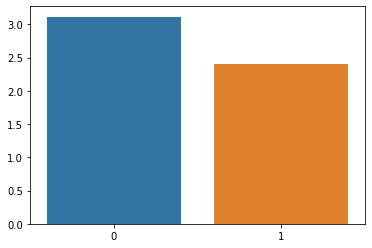

In [54]:
sns.barplot(x=list(range(len(Sigma))), y = Sigma)

In [55]:
lsa.view()

array([[ 1.91322165e-01, -9.74722984e-02],
       [ 2.89586425e-01, -1.00604677e-01],
       [ 1.45658643e-01, -1.26604473e-01],
       [ 1.53133964e-01, -1.43447851e-01],
       [ 2.84917715e-01, -2.27130893e-01],
       [ 2.13406956e-01, -7.86328295e-02],
       [ 8.66233047e-02, -5.55405113e-02],
       [ 2.13075117e-01, -2.01723971e-01],
       [ 8.06914560e-02, -5.42757916e-02],
       [ 1.80798509e-01, -4.71274635e-02],
       [ 1.02807626e-01, -5.54301539e-02],
       [ 8.16405277e-02, -9.31775171e-02],
       [ 5.31041753e-02, -3.96501490e-02],
       [ 1.79101475e-01, -1.20370625e-01],
       [ 9.19072456e-02, -6.25272623e-02],
       [ 1.08756296e-01, -9.52707886e-02],
       [ 1.83452820e-01, -6.45484745e-02],
       [ 1.51599801e-01, -1.19345051e-01],
       [ 1.25179841e-01, -8.44446419e-02],
       [ 6.87999871e-02, -4.81852539e-02],
       [ 1.06340389e-01, -7.37667566e-02],
       [ 1.44369048e-01, -7.52696919e-03],
       [ 1.85159847e-01,  1.39804055e-02],
       [ 9.

In [56]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = df['clean_documents'].sample(n=1000, random_state=0, replace=True).values

print('Headline before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Headline after vectorization: \n{}'.format(small_document_term_matrix[123]))

Headline before vectorization: (3)The stock exchange(s), shall issue Observation Letter No-objection letter listed entity within seven days receipt comments Board, suitably incorporating comments Observation Letter No-objection letter: Provided validity ‘Observation Letter’ No-objection letter stock exchanges shall six months date issuance.
Headline after vectorization: 
  (0, 1171)	1
  (0, 879)	1
  (0, 586)	1
  (0, 1385)	2
  (0, 1437)	2
  (0, 602)	1
  (0, 277)	1
  (0, 835)	1
  (0, 460)	1
  (0, 1220)	1
  (0, 604)	1
  (0, 458)	1
  (0, 833)	1
  (0, 362)	2
  (0, 1555)	1
  (0, 944)	1
  (0, 987)	3
  (0, 866)	6
  (0, 981)	3
  (0, 1383)	1
  (0, 1462)	1
  (0, 769)	1


In [57]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [58]:
lsa_keys = get_keys(lsa)
#lsa_keys

In [59]:
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [60]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(2):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [61]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)
topics = []
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])
    topics.append(top_n_words_lsa[i])

Topic 1:  shall board investment regulation alternative regulations offer shares fund listed
Topic 2:  board shall depository time minimum designated provisions information regulation conditions


In [62]:
var_explained = svd_model.explained_variance_ratio_.sum()
var_explained

0.03335087108093061

Topic words probability distribution

In [63]:
from nltk.probability import ConditionalFreqDist
from nltk.tokenize import word_tokenize

cfdist = ConditionalFreqDist()
b = []
for i in r0:
    for word in word_tokenize(i):
        condition = len(word)
        cfdist[condition][word] += 1
    for j in i.split():
        if(j not in b):
            b.append(j)
bcount = len(b)
bcount

2784

In [64]:
len(cfdist)

21

In [65]:
t=0
tok = []
freq = []
while(t<len(cfdist)):
    k = cfdist[t].keys()
    for i in topics:
        for j in i.split():
            if(j in k):
                tok.append(j)
                freq.append(cfdist[t][j])
    t=t+1

In [66]:
t=0
while(t<len(tok)):
    p = freq[t]/bcount
    print(tok[t])
    print(p)
    t=t+1

fund
0.003951149425287357
time
0.013649425287356323
shall
0.11099137931034483
board
0.004669540229885058
offer
0.021910919540229886
board
0.004669540229885058
shall
0.11099137931034483
shares
0.023347701149425287
listed
0.021192528735632182
minimum
0.005387931034482759
investment
0.016882183908045977
regulation
0.014367816091954023
depository
0.011853448275862068
designated
0.007902298850574713
provisions
0.010775862068965518
regulation
0.014367816091954023
conditions
0.011853448275862068
alternative
0.00035919540229885057
regulations
0.020114942528735632
information
0.019755747126436782


In [67]:
# Features or words used as features 
dictionary = vectorizer.get_feature_names()

# Term-Topic matrix
encoding_matrix = pd.DataFrame(svd_model.components_, index = ["topic_1","topic_2"], columns = (dictionary)).T

In [68]:
encoding_matrix

topic_1             topic_2
01      0.0013231378981855 -0.0017325436408472
05      0.0013255986766681 -0.0011640384919939
06      0.0034643092224942 -0.0041523961332956
09      0.0082679283583470 -0.0079875397681720
10      0.0290570258985405 -0.0043097031615689
...                    ...                 ...
written 0.0031204236765765 -0.0019743016272975
wtms    0.0007945544467841 -0.0007444501771702
year    0.0382008381485781 -0.0229451938083066
yearly  0.0074571822896820 -0.0058709220358677
years   0.0357958875229770 -0.0198972649288426

[1607 rows x 2 columns]

In [69]:
r = topic_encoded_df["documents"].values.tolist()
len(r)

228

In [70]:
rk0 = []
rk1 = []
t = 0
for i in lsa_keys:
    if(i==0):
        rk0.append(r[t])
    else:
        rk1.append(r[t])
    t=t+1

In [71]:
print(len(rk0))
print(len(rk1))

221
7


#### Cosine Score of regulations under topic classes

In [72]:
#Cosine similarity

from numpy import dot
from numpy.linalg import norm
import math

In [73]:
def veccalc(sentences):
    #Vector value calculation for regulations
    X0 = []
    val1 = []
    for i in sentences:
        val = [0] * 100
        c = 0
        for j in i:
            p=0
            val2 = [0]*100
            while(p<len(X2)):
                if(j == X2[p]):
                    val2 = X1[p]
                    break
                p=p+1
            #print(p)
            for ct in range(0, len(val)): 
                val1.append(val[ct] + val2[ct])
            val = val1
            val1 = []
            c=c+1
        d = []
        for l in val:
            l = l/c
            d.append(l)
        val = d
        X0.append(val)
    return X0

In [74]:
t=0
cos0 = []
for i in rk0:
    j = len(rk0)-1
    while(j>t):
        
        #Parsing the regulations

        s = []
        s.append(i)
        s.append(rk0[j])
        sentences = s
        k=[]
        m=0
        for p in s:
            k = p[0].split()
            sentences[m] = k
            m=m+1
            
        #Vector Calculation of regulations 
        X0 = veccalc(sentences) 
        
        #Cosine similarity calculation
        f=0
        while(f<len(X0)-1):
            g=len(X0)-1
            while(g>f):                       
                cos_sim = dot(X0[f], X0[g])/(norm(X0[f])*norm(X0[g]))
                if(math.isnan(cos_sim) == False):
                    cos0.append([t,j,cos_sim])
                g=g-1
            f=f+1 
        j=j-1
    t=t+1
cos0

/home/deepti-saravanan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


KeyboardInterrupt: 

In [ ]:
t=0
cos1 = []
for i in rk1:
    j = len(rk1)-1
    while(j>t):
        
        #Parsing the regulations
        s = []
        s.append(i)
        s.append(rk1[j])
        sentences = s
        k=[]
        m=0
        for p in s:
            k = p[0].split()
            sentences[m] = k
            m=m+1
            
        #Vector Calculation of regulations 
        X0 = veccalc(sentences) 
        
        #Cosine similarity calculation
        f=0
        while(f<len(X0)-1):
            g=len(X0)-1
            while(g>f):
                cos_sim = dot(X0[f], X0[g])/(norm(X0[f])*norm(X0[g]))
                if(math.isnan(cos_sim) == False):
                    cos1.append([t,j,cos_sim])
                g=g-1
            f=f+1 
        j=j-1
    t=t+1
cos1

#### Common words and tags analysis

In [75]:
import nltk
from nltk.tokenize import word_tokenize

In [76]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/deepti-saravanan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [77]:
from nltk import ngrams
from collections import Counter

In [78]:
def common(s,t,j):
    comm = []
    regid = []
    result = []
    sentence = ''
    for i in s:
        #print(i.lower())
        #print('--------------')
        sentence = sentence + ' ' + i.lower()

    # Since you are not considering periods and treats words with - as phrases
    sentence = sentence.replace('.', '').replace('-', ' ').replace('[','').replace(']','').replace(';','')
    #print(sentence)
    for n in range(len(sentence.split(' ')), 1, -1):
        phrases = []
    
        for token in ngrams(sentence.split(), n-3):
            #print(token)

            phrases.append(' '.join(token))
        if(len(phrases) == 0):
            phrase = []
            freq = 0
        else:
            phrase, freq = Counter(phrases).most_common(1)[0]
        if freq > 1:
            result.append((phrase, n))
            sentence = sentence.replace(phrase, '')

    for phrase, freq in result:
        regid.append([t,j])
        comm.append([phrase,freq])
    return comm, regid

In [79]:
t=0
common0 = []
regid0 = []
for i in rk0:
    j = len(rk0)-1
    while(j>t):
        b = rk0[j]
        #Parsing the regulations
        s = []
        s.append(i)
        s.append(b)
        
        text0 = word_tokenize(s[0].lower())
        tags0 = nltk.pos_tag(text0)
        text1 = word_tokenize(s[1].lower())
        tags1 = nltk.pos_tag(text1)
        
        comm0,regid01 = common(s,t,j)
        common0.extend(comm0)
        regid0.extend(regid01)
        
        j=j-1
    t=t+1

num=1
removeid = []
while(num<len(common0)):
    if(regid0[num] == regid0[num-1]):
        i = common0[num]
        j = common0[num-1]
        if(i[0] in j[0]):
            removeid.append(num)
    num = num + 1
print(removeid)
if(len(removeid) != 0):
    t=1
    for i in removeid:
        #print(i)
        #print(len(regid0))
        del regid0[i]
        del common0[i]
        if(t < len(removeid)):
            k=0
            while(k<len(removeid)):
                removeid[k] = removeid[k] - 1
                k=k+1
        t=t+1

num=0
while(num<len(common0)):
    print(regid0[num])
    print(common0[num])
    print('-----------------------------')
    num = num + 1

[16, 83, 138, 183, 190, 242, 286, 504, 533, 554, 630, 682, 805, 853, 860, 959, 1179, 1207, 1228, 1303, 1351, 1464, 1505, 1511, 1596, 1790, 1794, 1822, 1845, 1913, 1970, 2202, 2281, 2334, 2649, 2653, 2705, 2730, 2870, 2899, 3135, 3214, 3267, 3590, 3594, 3647, 3672, 3787, 3838, 3989, 4035, 4043, 4157, 4425, 4468, 4491, 4582, 4628, 4747, 4789, 4795, 4881, 4998, 5080, 5108, 5130, 5141, 5151, 5239, 5336, 5373, 5415, 5430, 5490, 5567, 5927, 5970, 6143, 6206, 6220, 6251, 6291, 6297, 6339, 6372, 6529, 6551, 6560, 6571, 6660, 6774, 6815, 6821, 6873, 6909, 7096, 7100, 7128, 7149, 7213, 7240, 7372, 7416, 7424, 7485, 7527, 7759, 7763, 7798, 7820, 7899, 7925, 8106, 8162, 8201, 8422, 8426, 8457, 8480, 8576, 8686, 8728, 8735, 8783, 8818, 9006, 9032, 9053, 9120, 9221, 9349, 9449, 9462, 9474, 9506, 9512, 9562, 9593, 9605, 9612, 9636, 9692, 9794, 9806, 9962, 9987, 10121, 10133, 10150, 10164, 10251, 10253, 10278, 10284, 10296, 10302, 10344, 10410, 10517, 10556, 10562, 10608, 10644, 10826, 10855, 10876, 1

In [ ]:
t=0
c0=[]
reg0 = []
while(t<len(common0)):
    i = common0[t]
    rcomm = regid0[t]
    rcomm0 = rcomm[0]
    rcomm1 = rcomm[1]
    if(i[0] in rk0[rcomm0]):
        if(i[0] in rk0[rcomm1]):
            if(i[0] != 'shall' and i[0] != 'may'):
                print(i[0])
                #if(i[0] not in c0):
                c0.append(i[0])
                reg0.append(regid0[t])
    t=t+1
reg0

material
securities
securities
regulations
regulations
securities
securities
regulations
made
accordance
made
regulation
the
regulation
made
the
regulation
proposed
issuer
debt
securities
debt securities
made
the
securities
arrangement
securities
debt securities
regulation
regulations
made
the
regulation
depository
depository
depository
depository
depository
regulations
made
regulations
regulations
accordance
made
securities
regulation
accordance
regulations
regulations
accordance
regulations
accordance
regulations
rules regulations
securities
accordance
regulations
depository
securities
depository
issuer
securities
depository
enter
depository
depository
depository
securities
issuer
depository
depository
depository
regulations
regulations
depository
rules
regulations
made
rules regulations
rules regulations
rules
accordance
securities
regulations
made
securities
securities
accordance
securities
issuer
issuer shall
made
regulation
issuer
proposed
securities
,
made
issue
debt securities


In [81]:
t=0
common1 = []
regid1 = []
for i in rk1:
    j = len(rk1)-1
    while(j>t):
        b = rk1[j]
        #Parsing the regulations
        s = []
        s.append(i)
        s.append(b)
        
        text0 = word_tokenize(s[0].lower())
        tags0 = nltk.pos_tag(text0)
        text1 = word_tokenize(s[1].lower())
        tags1 = nltk.pos_tag(text1)
        
        comm1,regid11 = common(s,t,j)
        common1.extend(comm1)
        regid1.extend(regid11)
        
        j=j-1
    t=t+1

num=1
removeid = []
while(num<len(common1)):
    if(regid1[num] == regid1[num-1]):
        i = common1[num]
        j = common1[num-1]
        if(i[0] in j[0]):
            removeid.append(num)
    num = num + 1

if(len(removeid) != 0):
    t=1
    for i in removeid:
        #print(t)
        del regid1[i]
        del common1[i]
        if(t < len(removeid)):
            k=0
            while(k<len(removeid)):
                removeid[k] = removeid[k] - 1
                k=k+1
        t=t+1

num=0
while(num<len(common1)):
    print(regid1[num])
    print(common1[num])
    print('-----------------------------')
    num = num + 1

[0, 6]
['(2)any exemption granted board sub regulation (1) shall subject applicant satisfying conditions may specified board including conditions complied continuous basis', 23]
-----------------------------
[0, 5]
['(2)any exemption granted board sub regulation (1) shall subject applicant satisfying conditions may specified board including conditions complied continuous basis', 23]
-----------------------------
[0, 4]
['applicant satisfying conditions may specified board including conditions complied continuous basis', 14]
-----------------------------
[0, 3]
['(2)any exemption granted board sub regulation (1) shall subject', 12]
-----------------------------
[0, 3]
['conditions', 4]
-----------------------------
[0, 2]
['(2)any exemption granted board sub regulation (1) shall subject applicant satisfying conditions may specified board including conditions complied continuous basis', 23]
-----------------------------
[0, 1]
['(2)any exemption granted board sub regulation (1) shall sub

In [82]:
t=0
reg1=[]
c1=[]
while(t<len(common1)):
    i = common1[t]
    rcomm = regid1[t]
    rcomm0 = rcomm[0]
    rcomm1 = rcomm[1]
    if(i[0] in rk1[rcomm0]):
        if(i[0] in rk1[rcomm1]):
            if(i[0] != 'shall' and i[0] != 'may'):
                #if(i[0] not in c1):
                print(i[0])
                c1.append(i[0])
                reg1.append(regid1[t])
    t=t+1
reg1

[]

#### Extracting subtle semantics

In [83]:
verbs = ['VB','VBD','VBG','VBN','VBP','VBZ','RB','NN']
verbsplus = ['TO','RP','IN','NN','NNP','JJ']
verbsec = ['IN']

In [84]:
def subtle(c,n,tags):
    #print(c)
    #print(n)
    subtlelist = []
    #s = ''
    t=0
    while(t<len(tags)):
        iterc = 0
        while(iterc < n):
            num = t
            i = tags[num]
            if(i[0] != c.split()[iterc]):
                break
            #print('$$$$$$$$$$$$$$$$$$$$$$$')
            #print(iterc)
            if(iterc == n-1):
                y=num-n+1
                p=y-5
                while(p<y):
                    if(p < len(tags)):
                        j=tags[p]
                        if(j[1] in verbs):
                            k = j[0]
                            if(p+1 < len(tags)):
                                j = tags[p+1]
                                if(j[1] in verbsplus):
                                    if(j[1] == 'NN'):
                                        temp = j[0]
                                        if(p+2 < len(tags)):
                                            j = tags[p+2]
                                            s = ''
                                            s = s + k
                                            s = s + ' ' + temp + ' ' + j[0]
                                            subtlelist.append(s)
                                            #print(s)
                                    else:
                                        s = ''
                                        s = s + k
                                        s = s + ' ' + j[0]
                                        subtlelist.append(s)
                                        #print(s)
                                else:
                                    s = k
                                    subtlelist.append(s)
                                    #print(s)
                    p=p+1
            if(iterc == n-1):
                y=num-n+1
                p=y
                while(p<y+8):
                    #print(p)
                    if(p < len(tags)):
                        j=tags[p]
                        if(j[1] in verbs):
                            k = j[0]
                            if(p+1 < len(tags)):
                                j = tags[p+1]
                                if(j[1] in verbsplus):
                                    if(j[1] == 'NN' or j[1] == 'NNP'):
                                        temp = j[0]
                                        if(p+2 < len(tags)):
                                            j = tags[p+2]
                                            s = ''
                                            s = s + k
                                            s = s + ' ' + temp + ' ' + j[0]
                                            subtlelist.append(s)
                                            #print(s)
                                    else:
                                        s = ''
                                        s = s + k
                                        s = s + ' ' + j[0]
                                        subtlelist.append(s)
                                        #print(s)
                                else:
                                    s = k
                                    subtlelist.append(s)
                                    #print(s)
                    p=p+1
            
            iterc = iterc + 1
        #print(iterc)
        t=t+1
    return subtlelist

In [85]:
t=0
semantics0 = []
for i in reg0:
    
    #Get the common word
    c = c0[t]
    n = len(c.split())
    #print(n)
    lol0 = i[0]
    lol1 = i[1]
    #POS tags
    text0 = word_tokenize(rk0[lol0].lower())
    tags0 = nltk.pos_tag(text0)
    #print(tags0)
    text1 = word_tokenize(rk0[lol1].lower())
    tags1 = nltk.pos_tag(text1)
    
    #Extract the required words
    #print('tag 0')
    s0 = subtle(c,n,tags0)
    #print('tag 1')
    s1 = subtle(c,n,tags1)
    if(len(s0) != 0 and len(s1) != 0):
        #print(s0)
        for tokens in s0:
            #print(tokens)
            #print('---------------------------')
            for j in s1:
                if(tokens == j):
                    #print(tokens)
                    s0.remove(tokens)
                    s1.remove(tokens)
                    break
        if(len(s0) != 0 and len(s1) != 0):
            semantics0.append([i[0],i[1],s0,s1])
    t=t+1
semantics0

[[0,
  214,
  ['registered board dematerialisation',
   'board dematerialisation municipal',
   'dematerialisation municipal',
   'debt',
   'proposed',
   'issued',
   'accordance',
   'act'],
  ['acted manager co-manager',
   'manager co-manager',
   'offering',
   'company',
   'publish distribute',
   'research report make',
   'report',
   'make public',
   'company',
   'restricts prohibits',
   'sale',
   'held subject',
   'company completion public',
   'completion public',
   'offering',
   'company completion public',
   'completion public',
   'offering',
   'provided research analyst',
   'research analyst research',
   'analyst research entity',
   'research entity may',
   'entity']],
 [0,
  210,
  ['registered board dematerialisation',
   'board dematerialisation municipal',
   'dematerialisation municipal',
   'debt',
   'proposed',
   'issued',
   'accordance',
   'act'],
  ['amendment', 'repeal', 'continue', 'apply similar']],
 [0,
  208,
  ['act', 'made thereunder .

In [86]:
sameind = []
for j in semantics0:
    k1 = j[0]
    k2 = j[1]
    ct = 0
    for i in rk0[k1].split():
        if(i in rk0[k2].split()):
            ct=ct+1
    if(ct > 10):
        if([k1,k2] not in sameind):
            sameind.append([k1,k2])
sameind

[[4, 180],
 [4, 123],
 [4, 116],
 [4, 54],
 [4, 53],
 [4, 33],
 [4, 7],
 [5, 143],
 [5, 33],
 [7, 123],
 [7, 33],
 [13, 180],
 [13, 172],
 [13, 163],
 [13, 116],
 [13, 54],
 [13, 53],
 [13, 37],
 [13, 33],
 [13, 17],
 [22, 53],
 [26, 182],
 [26, 56],
 [27, 215],
 [27, 194],
 [27, 155],
 [27, 143],
 [27, 135],
 [27, 131],
 [27, 97],
 [27, 91],
 [27, 53],
 [27, 48],
 [27, 38],
 [31, 35],
 [33, 190],
 [33, 185],
 [33, 184],
 [33, 183],
 [33, 180],
 [33, 178],
 [33, 176],
 [33, 174],
 [33, 170],
 [33, 169],
 [33, 164],
 [33, 163],
 [33, 161],
 [33, 159],
 [33, 155],
 [33, 148],
 [33, 145],
 [33, 143],
 [33, 135],
 [33, 120],
 [33, 117],
 [33, 116],
 [33, 91],
 [33, 84],
 [33, 80],
 [33, 64],
 [33, 63],
 [33, 61],
 [33, 59],
 [33, 56],
 [33, 55],
 [33, 54],
 [33, 53],
 [33, 37],
 [33, 34],
 [37, 215],
 [37, 214],
 [37, 195],
 [37, 186],
 [37, 183],
 [37, 182],
 [37, 180],
 [37, 164],
 [37, 161],
 [37, 155],
 [37, 149],
 [37, 145],
 [37, 143],
 [37, 129],
 [37, 128],
 [37, 123],
 [37, 122],


In [212]:
for j in semantics0:
    if(j[0] == 9 and j[1] == 11):
        print(j)

[9, 11, ['issuer corporate', 'entity', 'sending notice holders'], ['issuer', 'sending notice holders', 'debt', 'file copy notice', 'copy notice proposed', 'notice', 'proposed resolution stock', 'dissemination public', 'debt', 'issued rolled', 'subject', 'following', 'roll-over', 'approved special', 'resolution', 'passed', 'debt', 'consent', '%', 'debt', 'consent', '%', 'value municipal', 'debt', 'b', 'issuer', 'redeem municipal', 'debt', 'given positive', 'consent roll-over .', 'consent roll-over .', 'roll-over', 'face value municipal', 'value municipal', 'debt']]
[9, 11, ['dissemination public', 'issuer corporate', 'entity', 'sending notice holders'], ['value municipal', 'debt', 'issuer', 'redeem debt securities', 'debt', 'given positive', 'issuer', 'sending notice holders', 'notice', 'deed', 'provides continuation ;', 'continuation', 'issuer', 'redeem municipal', 'debt']]


In [94]:
rk0[194]

'16.Investment adviser shall ensure that,- (a)it obtains client, information necessary purpose giving investment advice, including following:- (i)age; 9 (ii)investment objectives including time wish stay invested, purposes investment ; (iii)income details; (iv)existing investments/ assets; (v)risk appetite/ tolerance; (vi)liability/borrowing details. (b)it process assessing risk client willing able take, including: (i)assessing client’s capacity absorbing loss; (ii)identifying whether client unwilling unable accept risk loss capital; (iii)appropriately interpreting client responses questions attributing inappropriate weight certain answers. (c)where tools used risk profiling, ensured tools fit purpose limitations identified mitigated; (d)any questions description questionnaires used establish risk client willing able take fair, clear misleading, ensure that: (i)questionnaire vague use double negatives complex language client may understand; (ii)questionnaire structured way contains lea

In [95]:
rk0[190]

'4.The following persons shall required seek registration regulation 3 subject fulfillment conditions stipulated therefor, — (a)Any person gives general comments good faith regard trends financial securities market economic situation comments specify particular securities investment product; (b)Any insurance agent insurance broker offers investment advice solely insurance products registered Insurance Regulatory Development Authority activity; (c)Any pension advisor offers investment advice solely pension products registered Pension Fund Regulatory Development Authority activity; 3 (d)Any distributor mutual funds, member self regulatory organisation recognised Board registered association asset management companies mutual funds, providing investment advice clients incidental primary activity; (e)Any advocate, solicitor law firm, provides investment advice clients, incidental legal practise; (f)Any member Institute Chartered Accountants India, Institute Company Secretaries India, Instit

In [92]:
rk0[192]

'(2)The Board may, time recognition body body corporate, delegate administration supervision investment advisers body body corporate terms conditions may specified Board.'

In [ ]:
t=0
for i in rk0[0].split():
    if(i in rk0[1].split()):
        print(i)
        print(t)
        print('-----------------')
    t=t+1

In [87]:
t=0
semantics1 = []
for i in reg1:
    
    #Get the common word
    c = c1[t]
    n = len(c.split())
    #print(n)
    lol0 = i[0]
    lol1 = i[1]
    #POS tags
    text0 = word_tokenize(rk1[lol0].lower())
    tags0 = nltk.pos_tag(text0)
    #print(tags0)
    text1 = word_tokenize(rk1[lol1].lower())
    tags1 = nltk.pos_tag(text1)
    
    #Extract the required words
    #print('tag 0')
    s0 = subtle(c,n,tags0)
    #print('tag 1')
    s1 = subtle(c,n,tags1)
    if(len(s0) != 0 and len(s1) != 0):
        for tokens in s0:
            #print(tokens)
            #print('---------------------------')
            for j in s1:
                if(tokens == j):
                    #print(tokens)
                    s0.remove(tokens)
                    s1.remove(tokens)
                    break
        if(len(s0) != 0 and len(s1) != 0):
            semantics1.append([i[0],i[1],s0,s1])
    t=t+1
semantics1

[]

In [248]:
rk1[1]

'(3) In case trades debt securities made counter, trades shall reported recognised stock exchange nationwide trading terminal platform may specified Board time time.'

In [204]:
rk1[0]

'(2)In case trades municipal debt securities made counter, trades shall reported recognised stock exchange nationwide trading terminal platform may specified Board time time.'

In [246]:
rk1[2]

'8.(1) The board directors every company, whose securities listed stock exchange, shall formulate publish official website, code practices procedures fair disclosure unpublished price sensitive information would follow order adhere principles set Schedule A regulations, without diluting provisions regulations manner.'

In [248]:
rk1[0]

'(5)(a) The board directors shall lay code conduct members board directors senior management listed entity. (b)The code conduct shall suitably incorporate duties independent directors laid Companies Act, 2013.'